# The Stack Datastructure

Using array implementation - assuming known fixed size.  
Ignoring exceptions.

**Operations**:
- Push
- Pop

**Comparisons**:
- python list
- python array
- numpy
- cython
- c++

**Disclaimer**:  
Significant bias because of implementation, have to rethink it
- time results include time to loop over operations (in favor of cpp)
- python versions definitely more comparable to each other than cpp
- cpp has additional but minimal overhead because the subprocess has to be created

## I. Implementation

### 1. Python List

In [129]:
class PyStackList(object):
    
    def __init__(self, size):
        self.top = -1
        self.stack = [0] * size
        
    def push(self, x):
        self.top += 1
        self.stack[self.top] = x
        
    def pop(self):
        self.top -= 1
        return self.stack[self.top + 1]

### 2. Python Array

In [88]:
import array


class PyStackArray(object):
    
    def __init__(self, size):
        self.top = -1
        self.stack = array.array("l", [0] * size)
        
    def push(self, x):
        self.top += 1
        self.stack[self.top] = x
        
    def pop(self):
        self.top -= 1
        return self.stack[self.top + 1]

### 3. Numpy

In [89]:
import numpy as np


class PyStackNumpy(object):
    
    def __init__(self, size):
        self.top = -1
        self.stack = np.ndarray((size,), dtype=np.int32)
        
    def push(self, x):
        self.top += 1
        self.stack[self.top] = 1
    
    def pop(self):
        self.top -= 1
        return self.stack[self.top + 1]

### 4. Cython

In [90]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [208]:
%%cython

import numpy as np
cimport numpy as np
from libc.stdlib cimport malloc

cdef class CyStack(object):
    
    cdef np.int32_t *stack
    cdef int top
    
    def __cinit__(self, size):
        self.top = -1
        self.stack = <np.int32_t*>malloc(size * sizeof(np.int32_t))
        
    cpdef push(self, np.int32_t x):
        self.top += 1
        self.stack[self.top] = x
        
    cpdef pop(self):
        self.top -= 1
        return self.stack[self.top + 1]

### 5. C++

In [94]:
%load_ext cppmagic

In [210]:
%%cpp -t

int N_ELEM = 100000;
int N_CYCLES = 3;
    

class CppStack{
    long *stack;
    int top;
    
    public: CppStack(int size){
        top = -1;
        stack = new long[size];
    }
    
    public: void push(long x){
        top += 1;
        stack[top] = x;
    }
    
    public: long pop(){
        top -= 1;
        return stack[top + 1];
    }
};

int main(){
    
    CppStack stack(N_ELEM);
    for(int cycles = 0; cycles < N_CYCLES; ++cycles){
        for(int i=0; i < N_ELEM; ++i)
            stack.push(i);
        for(int i=0; i < N_ELEM; ++i)
            stack.pop();
    }
    
}

<TimeitResult : 12.9 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [211]:
cpp_res = Out[max(list(Out.keys()))]

## II. Evaluation

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
N_ELEM = 100000
N_CYCLES = 3

def get_runtime(obj):
    for _ in range(N_CYCLES):
        for i in range(N_ELEM):
            obj.push(i)
        for _ in range(N_ELEM):
            obj.pop()

time_res = {}
print("Python List")
tmp_ = %timeit -o get_runtime(PyStackList(N_ELEM))
time_res["Python List"] = tmp_

print("Python Array")
tmp_ = %timeit -o get_runtime(PyStackArray(N_ELEM))
time_res["Python Array"] = tmp_

print("Python Numpy")
tmp_ = %timeit -o get_runtime(PyStackNumpy(N_ELEM))
time_res["Python Numpy"] = tmp_

print("Cython")
tmp_ = %timeit -o get_runtime(CyStack(N_ELEM))
time_res["Cython"] = tmp_

time_res["C++"] = cpp_res

Python List
347 ms ± 41.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Python Array
417 ms ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Python Numpy
371 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Cython
71.8 ms ± 5.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


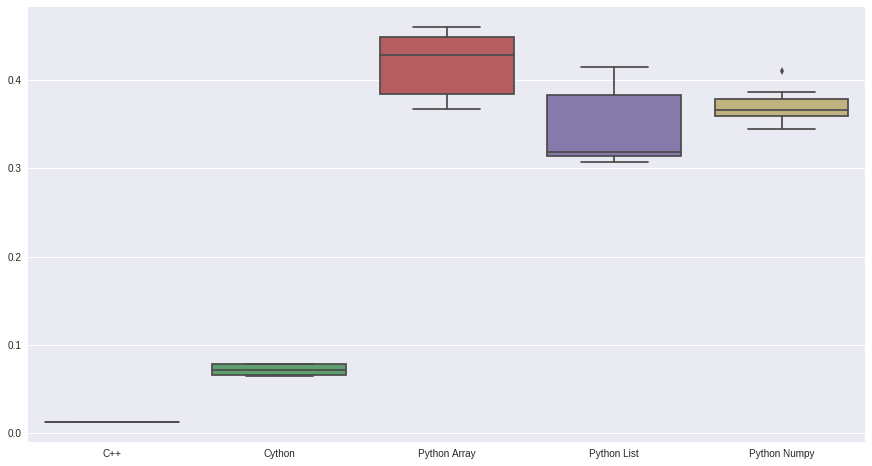

In [236]:
def plot_results(results_dict):
    plt.figure(figsize=(15, 8))
    d = {key: res.timings for key, res in results_dict.items()}
    df = pd.DataFrame(d)
    sns.boxplot(data=df)
    
plot_results(time_res)

## III. Conclusion

- Definitely WIP, maybe easier for other data structures/algos
- Dont know how comparable is C++, has advantage in operations loop - should benchmark that
- Cython looks quite good, even though operation loops are in python
- Python implementations are quite similar, not much difference in indexing speed (pretty much all that happens)
- Numpy shines in vectorized operations, which are not used here